<a href="https://colab.research.google.com/github/MartinRivira/Image-Classification-for-Flowers-Using-CNN/blob/main/identificandoflores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
from google.colab import files
dataset = files.upload()  # Selecciona tu archivo zip de flores aquí


Saving flowers.zip to flowers.zip


In [3]:
import zipfile
with zipfile.ZipFile('/content/flowers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/flowers')


In [7]:
train_generator = train_datagen.flow_from_directory(
    '/content/flowers',  # Ruta a tu dataset descomprimido
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Cambiado a 'categorical'
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/flowers',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Cambiado a 'categorical'
    subset='validation'
)



Found 3454 images belonging to 1 classes.
Found 863 images belonging to 1 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 categorías (flores)
])

model.compile(
    loss='sparse_categorical_crossentropy',  # Cambiar a 'sparse_categorical_crossentropy'
    optimizer='adam',
    metrics=['accuracy']
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=25
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9542 - loss: 0.0808 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
  1/107 ━━━━━━━━━━━━━━━━━━━━ 2:58 2s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - a

In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Accuracy: {accuracy*100:.2f}%')


27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 681ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Accuracy: 100.00%


In [14]:
model.save('modelo_flores.h5')


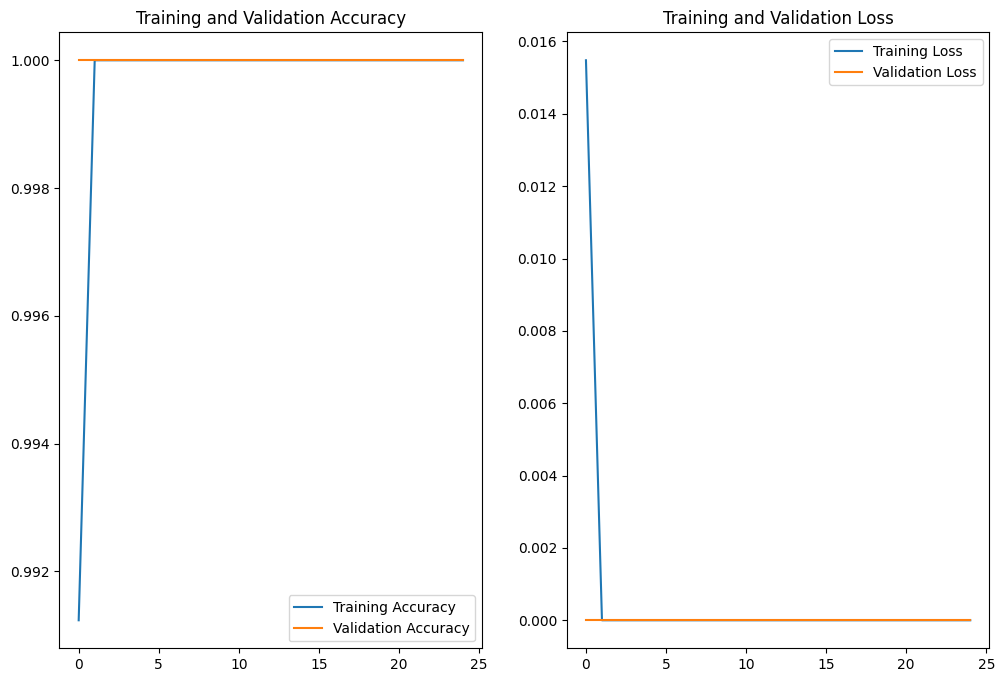

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [33]:
from google.colab import files
uploaded = files.upload()


Saving 5794835_d15905c7c8_n.jpg to 5794835_d15905c7c8_n.jpg


In [34]:
from tensorflow.keras.preprocessing import image

img_path = '/content/5794835_d15905c7c8_n.jpg'  # Ruta a tu imagen
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch
img_array /= 255.  # Normalizar la imagen

pred = model.predict(img_array)
clases = train_generator.class_indices
clases_invertido = {v: k for k, v in clases.items()}
pred_clase = np.argmax(pred)
print(f'La flor es: {clases_invertido[pred_clase]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
La flor es: daisy
